##  Understanding variation in the patterns of activity and sleep

### Source files are 10 second-resolution Activity and Sleep (based on 40sec of immobility) from 24 male wild type C57BL/6J mice.  These mice were individually housed in groups of 6 cages (1-6, 7-12, 13-18 and 19-24).  Each file is 1 week of 12:12 light:dark cycles, with the light period starting at time 0.

In [14]:
# set up environment (import python libraries)

import pandas as pd   #data IO and timeseries analysis, built on numpy
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
# set styling for figures
sns.set(style="white")
sns.set_context("notebook")

In [25]:
# show plots in notebook
%matplotlib inline  

In [26]:
data1 = pd.read_csv('../PIRdata/24mice_activity_LD1week.csv', parse_dates=True, index_col=[0])  # import data as two dataframes
ssdata1 = pd.read_csv('../PIRdata/24mice_sleep_LD1week.csv', parse_dates=True, index_col=[0])
data1.head()

,1,2,3,4,5,6,A_LDR,7,8,9,...,17,18,C_LDR,19,20,21,22,23,24,D_LDR
Time,,,,,,,,,,,,,,,,,,,,,
2015-02-26 00:00:00,0.0,0.0,0.0,0.0,0.0,25.0,575.0,51.0,0.0,62.0,...,9.0,44.0,897.0,71.0,0.0,0.0,65.0,0.0,47.0,302.0
2015-02-26 00:00:10,0.0,0.0,0.0,0.0,0.0,51.0,576.0,57.0,0.0,84.0,...,56.0,66.0,895.0,73.0,0.0,0.0,79.0,0.0,68.0,302.0
2015-02-26 00:00:20,0.0,0.0,0.0,0.0,0.0,40.0,575.0,49.0,0.0,49.0,...,55.0,76.0,896.0,69.0,0.0,0.0,77.0,0.0,72.0,303.0
2015-02-26 00:00:30,35.0,0.0,0.0,10.0,2.0,21.0,575.0,57.0,13.0,84.0,...,59.0,49.0,895.0,89.0,0.0,0.0,74.0,0.0,70.0,299.0
2015-02-26 00:00:40,46.0,0.0,0.0,16.0,12.0,34.0,574.0,40.0,0.0,28.0,...,67.0,67.0,894.0,70.0,0.0,0.0,73.0,0.0,81.0,299.0


In [27]:
ts30 = data1.resample('30T').mean()   # obtain 30min averages
ss30 = ssdata1.resample('30T').mean()

In [28]:
# filter out Light measurements (leaving only activity or sleep data to cluster)
ts30twist = ts30.filter(regex='\d').transpose()
ts30twist.head()  # show top of new (transposed) dataframe


Time,2015-02-26 00:00:00,2015-02-26 00:30:00,2015-02-26 01:00:00,2015-02-26 01:30:00,2015-02-26 02:00:00,2015-02-26 02:30:00,2015-02-26 03:00:00,2015-02-26 03:30:00,2015-02-26 04:00:00,2015-02-26 04:30:00,...,2015-03-04 19:30:00,2015-03-04 20:00:00,2015-03-04 20:30:00,2015-03-04 21:00:00,2015-03-04 21:30:00,2015-03-04 22:00:00,2015-03-04 22:30:00,2015-03-04 23:00:00,2015-03-04 23:30:00,2015-03-05 00:00:00
1,26.150000,0.251397,0.000000,0.255556,0.000000,1.227778,0.000000,1.111111,2.094444,2.233333,...,21.394444,36.300000,26.316667,0.677778,0.798883,6.000000,25.722222,26.638889,7.675978,65.0
2,13.466667,0.000000,0.111111,0.050000,0.061111,0.388889,0.027933,0.250000,17.422222,0.338889,...,0.983333,49.766667,17.372222,0.000000,28.966480,21.600000,0.155556,28.244444,24.581006,0.0
3,20.433333,0.055866,0.238889,11.177778,0.000000,0.100000,21.553073,0.127778,0.000000,6.288889,...,9.777778,24.455556,17.677778,7.777778,5.385475,21.538889,5.216667,24.372222,3.519553,0.0
4,3.633333,0.094972,5.105556,18.655556,4.700000,7.216667,0.000000,0.000000,0.000000,14.705556,...,17.150000,13.022222,16.211111,32.938889,11.720670,5.472222,9.016667,43.655556,11.307263,0.0
5,6.288889,0.000000,1.088889,8.972222,0.727778,0.188889,0.519553,4.155556,0.622222,12.750000,...,0.088889,0.000000,30.211111,14.733333,1.083799,9.666667,27.905556,4.127778,11.396648,0.0


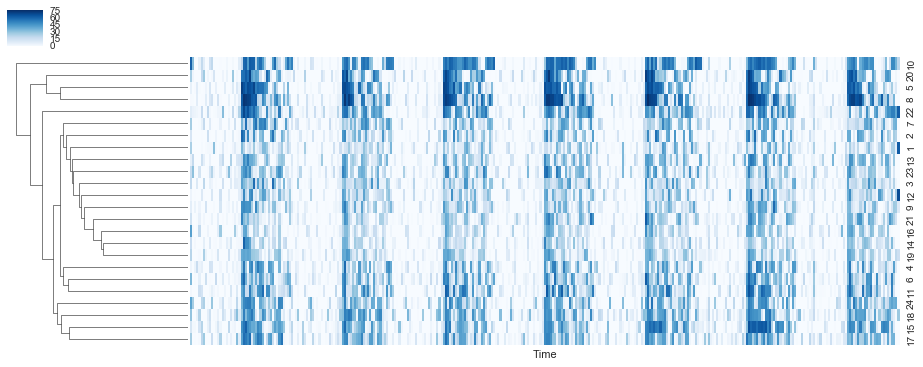

In [29]:
sns.clustermap(ts30twist, xticklabels=False, col_cluster=False,figsize=(16,6), cmap='Blues',cbar=True)
#plt.savefig('../../Figures/wt1weekLD_act30cluster_labels.jpg', format='jpeg', dpi=600,pad_inches=0.2)

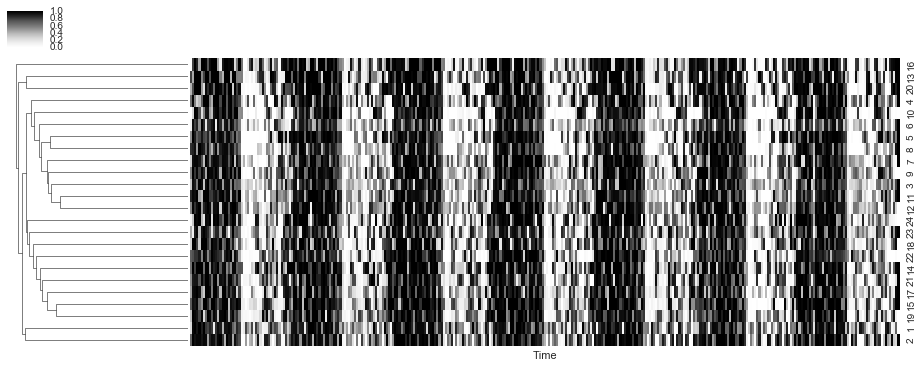

In [30]:
ss30twist = ss30.filter(regex='\d').transpose()
sns.clustermap(ss30twist, xticklabels=False, col_cluster=False,figsize=(16,6), cmap='Greys',cbar=True)
#plt.savefig('../../Figures/wt1weekLD_sleep30cluster_labels.jpg', format='jpeg', dpi=600,pad_inches=0.2)

##  Plenty of interesting differences, even in a group of littlemate C57BL/6J male mice 
 '5' '16'(ultradian rhythmicity)

In [31]:
# Average 24hr pattern of activity over 7 days for each mouse (30min bins to match previous figures)
avT30 = ts30.groupby(lambda x:x.time).mean()
semT30 = ts30.groupby(lambda x:x.time).sem()

# Average 24hr pattern of sleep over 7 days for each mouse
avT30s = ss30.groupby(lambda x:x.time).mean()
semT30s = ss30.groupby(lambda x:x.time).sem()

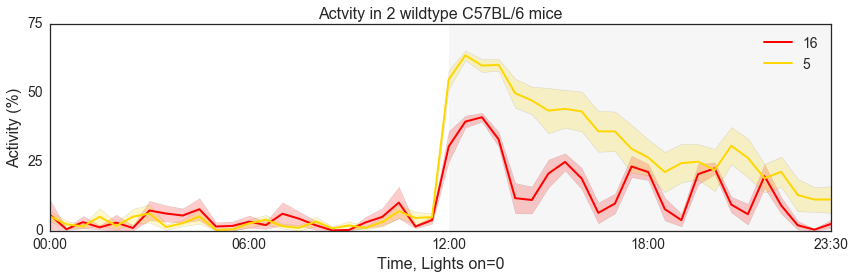

In [32]:
# Plot to compare average daily patterns of activity from two mice

LDR = avT30.filter(regex='LDR').mean(axis=1)
Act1 = avT30.filter(regex='16').mean(axis=1)  
Act2 = avT30.filter(regex='5').mean(axis=1)
sem1 = semT30.filter(regex='16').mean(axis=1)
sem2 = semT30.filter(regex='5').mean(axis=1)
# plot it!
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
#ax.fill_between(LDR.index, 0,100, lw=1, label='Light',  facecolor='gold',alpha=0.2)
ax.fill_between(LDR.index, 0,100, where=LDR<=10,lw=0, alpha=0.1, facecolor='#aaaaaa')
ax.plot(Act1.index, Act1, lw=2, label='16', color='red')
ax.plot(Act2.index, Act2, lw=2, label='5',  color='gold')
ax.fill_between(sem1.index, Act1 + sem1,  Act1 - sem1, facecolor='red', alpha=0.2)
ax.fill_between(sem2.index, Act2 + sem2,  Act2 - sem2, facecolor='gold', alpha=0.2)

ax.set_title('Actvity in 2 wildtype C57BL/6 mice', fontsize=16)
ax.legend(loc='best', fontsize=14)
ax.set_xlabel('Time, Lights on=0', fontsize=16)
ax.set_xticks(['00:00', '06:00','12:00','18:00', '23:30'])
ax.set_ylabel('Activity (%)', fontsize=16)
ax.set_xticklabels(['00:00', '06:00','12:00','18:00', '23:30'],fontsize=14)
ax.set_yticks([0,25,50,75])
ax.set_yticklabels([0,25,50,75], fontsize=14)
ax.set_ybound([0,75])
ax.set_xbound(['00:00','23:30'])
plt.tight_layout()

#plt.savefig('../../Figures/2mouse_active_compare30.jpg', format='jpeg', dpi=600)

fig.show()

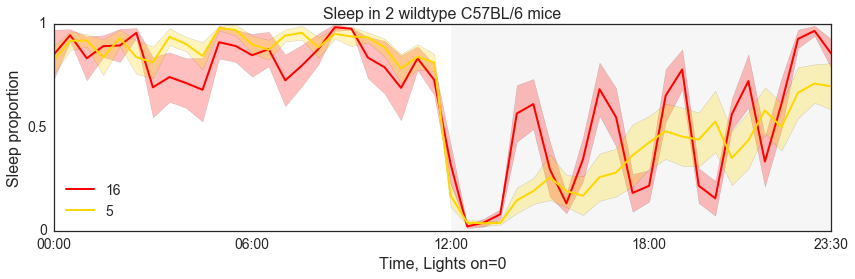

In [33]:
# Plot to compare average daily patterns of sleep in two mice

sLDR = avT30.filter(regex='LDR').mean(axis=1)
Sleep1 = avT30s.filter(regex='16').mean(axis=1)
Sleep2 = avT30s.filter(regex='5').mean(axis=1)
Ssem1 = semT30s.filter(regex='16').mean(axis=1)
Ssem2 = semT30s.filter(regex='5').mean(axis=1)

# plot the data
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)


ax.fill_between(sLDR.index, 0,1, where=sLDR<=10,lw=0, alpha=0.1, facecolor='#aaaaaa')
ax.plot(Sleep1.index, Sleep1, lw=2, label='16', color='red')
ax.plot(Sleep2.index, Sleep2, lw=2, label= '5',  color='gold')
ax.fill_between(Ssem1.index, Sleep1 + Ssem1,  Sleep1 - Ssem1, facecolor='red', alpha=0.25)
ax.fill_between(Ssem2.index, Sleep2 + Ssem2,  Sleep2 - Ssem2, facecolor='gold', alpha=0.25)

ax.set_title('Sleep in 2 wildtype C57BL/6 mice', fontsize=16)
ax.legend(loc='best', fontsize=14)
ax.set_xlabel('Time, Lights on=0', fontsize=16)
ax.set_xticks(['00:00', '06:00','12:00','18:00', '23:30'])
ax.set_ylabel('Sleep proportion', fontsize=16)
ax.set_xticklabels(['00:00', '06:00','12:00','18:00', '23:30'],fontsize=14)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0,0.5,1], fontsize=14)
ax.set_ybound([0,1])
ax.set_xbound(['00:00','23:30'])
plt.tight_layout()

#plt.savefig('../../Figures/2mouse_sleep_compare30.jpg', format='jpeg', dpi=600)
fig.show()